# Applying ROE analysis to companies
## using conda packages and yahoo finance

In [1]:
# Date
from datetime import date

#Data Manipulation
import pandas as pd
import numpy as np
from pandas import DataFrame

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# API
import yfinance as yf
import yahoo_fin.stock_info as si

### Set the variable to a company that you wish to analyze

In [2]:
company = "GME"

### Get basic stats before roe analysis

In [3]:
valuation = si.get_stats_valuation(company).iloc[:,:2]
valuation

,0,1
0,Market Cap (intraday) 5,16.74B
1,Enterprise Value 3,17.5B
2,Trailing P/E,NaN
3,Forward P/E 1,-446.25
4,PEG Ratio (5 yr expected) 1,4.66
5,Price/Sales (ttm),3.29
6,Price/Book (mrq),35.36
7,Enterprise Value/Revenue 3,3.44
8,Enterprise Value/EBITDA 7,-103.81


### Get all three kinds of financial statements

In [4]:
CF = si.get_cash_flow(company).transpose()
BS = si.get_balance_sheet(company).transpose()
IS = si.get_income_statement(company).transpose()
print(CF.info())
print(BS.info())
print(IS.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-01-30 to 2018-02-03
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   changeToLiabilities                    4 non-null      float64
 1   totalCashflowsFromInvestingActivities  4 non-null      float64
 2   netBorrowings                          4 non-null      float64
 3   totalCashFromFinancingActivities       4 non-null      float64
 4   changeToOperatingActivities            4 non-null      float64
 5   issuanceOfStock                        4 non-null      float64
 6   netIncome                              4 non-null      float64
 7   changeInCash                           4 non-null      float64
 8   effectOfExchangeRate                   4 non-null      float64
 9   totalCashFromOperatingActivities       4 non-null      float64
 10  depreciation                           4 non-null      fl

### Numbers related to profitability

In [5]:
Profitability = pd.DataFrame()
Profitability["Gross_Profit_Margin"] = (IS["grossProfit"]/IS["totalRevenue"])
Profitability["Net_Profit_Margin"] = (IS["netIncome"]/IS["totalRevenue"])
Profitability["Operating_Profit_Margin"] = (IS["operatingIncome"]/IS["totalRevenue"])
Profitability["Operating_ROA"] = (IS["operatingIncome"]/BS["totalAssets"])
Profitability["ROA"] = (IS["netIncome"]/BS["totalAssets"])
Profitability["ROE"] = (IS["netIncome"]/BS["totalStockholderEquity"])

Profitability

,Gross_Profit_Margin,Net_Profit_Margin,Operating_Profit_Margin,Operating_ROA,ROA,ROE
endDate,,,,,,
2021-01-30,0.247456,-0.0423,-0.04898,-0.100825,-0.087074,-0.493016
2020-02-01,0.29519,-0.072827,0.00948,0.02174,-0.167004,-0.770074
2019-02-02,0.278578,-0.081228,0.038683,0.079247,-0.166407,-0.503667
2018-02-03,0.29073,0.00406,0.051971,0.088107,0.006883,0.015669


## Dupont analysis of the company
### ROE = NetIncome / Equity = Net_Profit_Margin x Asset Turnover x Leverage

In [6]:
Dupont = pd.DataFrame()
Dupont["ROE"] = (IS["netIncome"]/BS["totalStockholderEquity"])
Dupont["Net_Profit_Margin"] = (IS["netIncome"]/IS["totalRevenue"])
Dupont["Total Asset Turnover"] = (IS["totalRevenue"]/BS["totalAssets"])
Dupont["Leverage"] = (BS["totalAssets"]/BS["totalStockholderEquity"])
Dupont['date'] = pd.date_range(start='12/31/2017', periods=len(Dupont), freq='Y')[::-1]
Dupont['ROE_Test'] = Dupont['Total Asset Turnover'] * Dupont['Net_Profit_Margin'] * Dupont['Leverage']
Dupont

,ROE,Net_Profit_Margin,Total Asset Turnover,Leverage,date,ROE_Test
endDate,,,,,,
2021-01-30,-0.493016,-0.0423,2.058481,5.662011,2020-12-31,-0.493016
2020-02-01,-0.770074,-0.072827,2.293152,4.611120,2019-12-31,-0.770074
2019-02-02,-0.503667,-0.081228,2.048636,3.026718,2018-12-31,-0.503667
2018-02-03,0.015669,0.00406,1.695315,2.276631,2017-12-31,0.015669


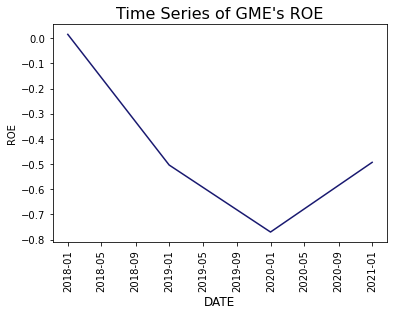

In [7]:
plt.plot(Dupont['date'], Dupont['ROE'], label='ROE', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("ROE")
plt.title(f"Time Series of {company}'s ROE", fontsize = "16")
plt.show()

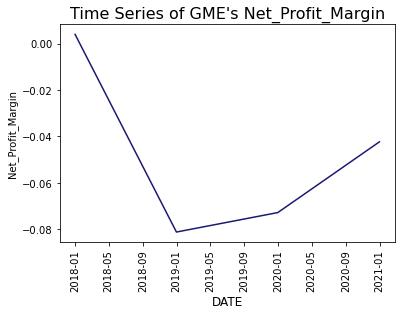

In [8]:
plt.plot(Dupont['date'], Dupont['Net_Profit_Margin'], label='Net_Profit_Margin', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Net_Profit_Margin")
plt.title(f"Time Series of {company}'s Net_Profit_Margin", fontsize = "16")
plt.show()

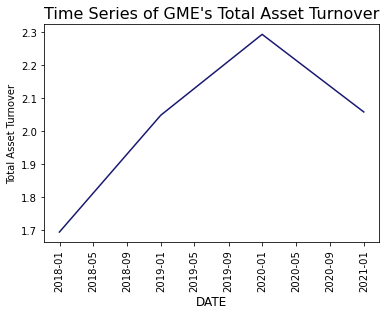

In [9]:
plt.plot(Dupont['date'], Dupont['Total Asset Turnover'], label='Total Asset Turnover', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Total Asset Turnover")
plt.title(f"Time Series of {company}'s Total Asset Turnover", fontsize = "16")
plt.show()

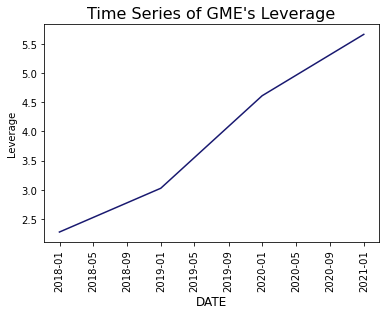

In [10]:
plt.plot(Dupont['date'], Dupont['Leverage'], label='Leverage', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Leverage")
plt.title(f"Time Series of {company}'s Leverage", fontsize = "16")
plt.show()